<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/DBSCAN(InsuranceDataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving InsuranceDataset.csv to InsuranceDataset.csv


In [2]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("InsuranceDataset.csv");

print(df.head())


   Premiums Paid  Age  Days to Renew  Claims made  Income
0           2800   26            233  3890.076336   28000
1           2950   27            130  2294.444444   29500
2           3100   28            144  2564.545455   31000
3           3250   30             65  1978.260870   32500
4           3400   32             56  2009.090909   34000


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB
None


In [5]:
stscaler = StandardScaler().fit(df)
X = stscaler.transform(df)

In [6]:
X

array([[-1.44186667e+00, -1.45534514e+00,  1.28517712e+00,
        -6.37613145e-01, -1.71481604e+00],
       [-1.41966646e+00, -1.38297591e+00,  1.09571051e-01,
        -7.54704362e-01, -1.68017329e+00],
       [-1.39746625e+00, -1.31060669e+00,  2.69362168e-01,
        -7.34883716e-01, -1.64553055e+00],
       [-1.37526604e+00, -1.16586823e+00, -6.32316276e-01,
        -7.77906656e-01, -1.61088780e+00],
       [-1.35306583e+00, -1.02112978e+00, -7.35039137e-01,
        -7.75644275e-01, -1.57624505e+00],
       [-1.33086562e+00, -8.04022103e-01, -3.58388647e-01,
        -7.50667592e-01, -1.54160230e+00],
       [-1.30866541e+00, -1.52699067e-01, -2.89906740e-01,
        -7.39374696e-01, -1.50695955e+00],
       [-1.28646520e+00, -8.03298411e-02, -8.26348346e-01,
        -7.60357693e-01, -1.47231680e+00],
       [-1.26426499e+00, -7.96061488e-03, -5.06766113e-01,
        -7.37581814e-01, -1.43767406e+00],
       [-9.34961864e-01,  7.15731647e-01,  9.08526635e-01,
        -4.16133813e-01

In [7]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

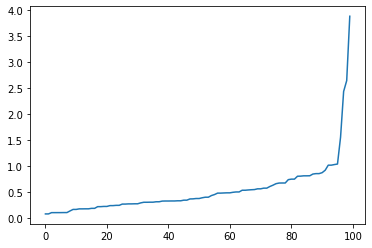

In [8]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [31]:
dbscan = DBSCAN(eps=.7, min_samples=7)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [19]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
       -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
        0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1])

In [32]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [13]:
cl

,cluster
0,-1
1,0
2,0
3,0
4,0
...,...
95,-1
96,-1
97,-1
98,-1


In [33]:
cl.value_counts()

cluster
-1         62
 2         16
 0         16
 1          6
dtype: int64

In [34]:
pd.concat([df,cl],axis=1)

,Premiums Paid,Age,Days to Renew,Claims made,Income,cluster
0,2800,26,233,3890.076336,28000,-1
1,2950,27,130,2294.444444,29500,-1
2,3100,28,144,2564.545455,31000,-1
3,3250,30,65,1978.260870,32500,-1
4,3400,32,56,2009.090909,34000,-1
...,...,...,...,...,...,...
95,25575,63,76,16161.979170,170500,-1
96,25800,62,166,23715.151520,172000,-1
97,26025,59,167,24043.401020,173500,-1
98,26250,58,245,40147.058820,175000,-1


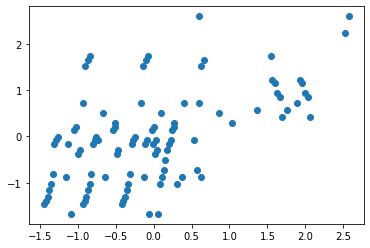

In [35]:
plt.scatter(X[:,0], X[:,1])

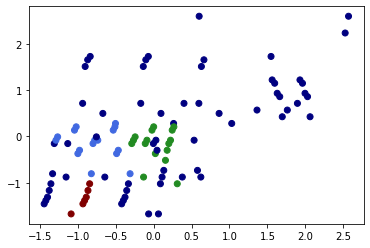

In [36]:
from matplotlib import pyplot as plt
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(dbscan.labels_))